# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<span style="color:blue"><b>#1. Is the distribution of body temperatures normal?</b></span>

One of the first steps we can take to get a sense of the data is visualization, for example, with a <b>histogram.</b> To determine the number of bins to use in a histogram, an easy rule-of-thumb is to take the square root of the number of observations.


In [3]:
# Number of observations in the dataframe
print(len(df))

130


The square root of n=130 is 11.4, so we'll round to 12 bins.

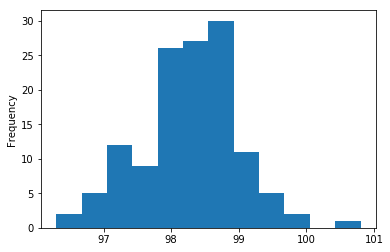

In [4]:
# Plot the temperature data
df['temperature'].plot(kind='hist', bins=12)

# Display the histogram
plt.show()

In [5]:
# Conduct Shapiro-Wilks test for normality
data = df['temperature']
shapiro_results = scipy.stats.shapiro(data)

print(shapiro_results)

(0.9865769743919373, 0.2331680953502655)


The distribution of the data looks roughly normal with no obvious signs of skew. The sample size is also greater than or equal to 30, which also supports our assumption of the normality of the distribution.

Further, the Shapiro-Wilks test for normality returned a test statistic of 98.66 and a p-value of 0.23. Assuming our alpha level is 0.05, 0.23 is greater than this, so we retain the null hypothesis of the test, namely that the data are sampled from a <b>normal distribution</b>.

<span style="color:blue"><b>#2. Is the sample size large? Are the observations independent?</b></span>

The sample size is greater than or equal to 30, so it's of a sufficient size. If the population of interest is human beings, the sample can't really be considered large. However, it does help with meeting the assumption of <b>independence</b>, as from the description above, we do not know whether the data were collected with or without replacement from the original population of interest. However, we can assume that if the population is humans, broadly speaking, the sample size of 130 is most certainly less than or equal to 10% of the population. This tells us that we can treat the observations as independent.

<span style="color:blue"><b>#3.  Is the true population mean really 98.6 degrees F?</b></span>

</b>First, try a bootstrap hypothesis test.</b>

In [6]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [7]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In order to conduct an hypothesis test, we should first spell out both the null and alternative hypotheses:

H0 (null hypothesis): The true population mean temperature is 98.6 degrees.

H1 (alternative hypothesis): The true population mean temperature is not 98.6 degrees.

In [8]:
# Conduct the hypothesis test
np.random.seed(42)

# Compute mean of combined data set: combined_mean
temp_mean = np.mean(df['temperature'])

# Get bootstrap replicates 
bs_replicates_temp = draw_bs_reps(df['temperature'], np.mean, 10000)

# Compute 95% confidence interval: CI
CI = np.percentile(bs_replicates_temp, [2.5, 97.5])

# Print the results
print('mean body temperature (in Fahrenheit) =', temp_mean, ' degrees')
print('95% confidence interval =', CI, ' degrees')


mean body temperature (in Fahrenheit) = 98.24923076923078  degrees
95% confidence interval = [98.12461538 98.37384615]  degrees


With this confidence interval, we can say with 95% certainty that the true mean body temperature of the population of interest is between 98.12 and 98.37 degrees. With this, <b>we can reject the null hypothesis</b> that the mean body temperature is 98.6 degrees.

<b>Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?</b>

We would use <b>a one-sample test</b>, because the data include a single simple random sample. We want to know whether the mean of the sample deviates from some assumed value--in this case, a mean body temperature of 98.6 degrees.

<b>In this situation, is it appropriate to use the t or z statistic?</b>

In this situation, we want to use a <b>t statistic</b>, because we are using a sample mean. The true population mean is unknown to us, making a z statistic inappropriate. What we have is not the actual population mean, but an approximation of it.

In [9]:
# Compute the sample standard deviation
temp_std = np.std(df['temperature'])

# Compute the t statistic
t = (temp_mean - 98.6)/(temp_std/np.sqrt(len(df['temperature'])))
print(t)

-5.475925202078116


Using a t-table, we can look up the critical value to indicate significance at alpha=0.05 for a 95% confidence interval. Using the table, we see that at 100 degrees of freedom, the critical value is +/-1.984; with our 99 degrees of freedom (n-1 = 100-1), the value we calculated for t is more extreme than the critical value, so we can again <b>reject the null hypothesis</b> as we did above.

<b>Now try using the other test. How is the result be different? Why?</b>

In [10]:
# Compute the z statistic
z = (temp_mean - 98.6)/temp_std
print(z)

-0.48027041116080765


Lots of issues with this. In order to calculate the z statistic, we need to know the population standard deviation, and we don't know this (we usually don't know this). In its stead, we can use an approximation, or the sample standard deviation. But, the formula for calculating a t statistic accounts for the sample size by dividing the sample standard deviation by the square root of the sample size, whereas the formula for the z statistic does not (because the assumptions about which population parameters are known are different in each equation).  

<span style="color:blue"><b>#4: Draw a small sample of size 10 from the data and repeat both frequentist tests.</b></span>

<b>Which one is the correct one to use?</b>

For the small sample of size 10, if we are assuming that the data is the population, we can calculate a z statistic. Under this assumption, the population parameters would be known to us.

In [11]:
# Set seed
np.random.seed(42)

# Draw the random sample
temp_sample = np.random.choice(df['temperature'], size=10)

# Calculate the sample mean
temp_sample_mean = np.mean(temp_sample)

# Calculate the z statistic
z = str((temp_sample_mean - temp_mean)/temp_std)

# Calculate the t statistic
t = str((temp_sample_mean - temp_mean)/(temp_std/np.sqrt(len(temp_sample))))

# Print results
print('z statistic = ', z)
print('t statistic = ', t)

z statistic =  -0.27278516774267797
t statistic =  -0.8626224419779547


<b>What do you notice? What does this tell you about the difference in application of the t and z statistic?</b>

Like the previous calculation, the z statistic is closer to 0 than the t statistic. From both, as well, we see that the results of both are very different numbers, underscoring the importance of correctly selecting a test for the data and sample at hand.

<span style="color:blue"><b>#5. At what temperature should we consider someone's temperature to be "abnormal"?</b></span>

As in the previous example, try calculating everything using the bootstrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [12]:
# Look up df=129, alpha=0.05 (for two tails); compute margin of error for one sample
margin_of_error = 1.9785 * (temp_std/np.sqrt(129))

# Compute 95% confidence interval: CI
CI = np.percentile(bs_replicates_temp, [2.5, 97.5])

# Print the results
print('margin of error = ', margin_of_error, ' degrees')
print('mean body temperature (in Fahrenheit) =', temp_mean, ' degrees')
print('95% confidence interval =', CI, ' degrees')


margin of error =  0.12722628871376737  degrees
mean body temperature (in Fahrenheit) = 98.24923076923078  degrees
95% confidence interval = [98.12461538 98.37384615]  degrees


Someone's body temperature would be considered abnormal if it were below the lowest bound of the confidence interval minus the margin of error--97.99 degrees--or above the highest bound of the confidence interval plus the margin of error--98.5 degrees.

<span style="color:blue"><b>#6. Is there a significant difference between males and females in normal temperature?</b></span>

H0 (null hypothesis): The difference between males and females in normal temperature is 0.

H1 (alternative hypothesis): The difference between males and females in normal temperature is not 0.

In [13]:
# Subset the data: male_data, female_data
male_data = df[df['gender'] == 'M']
female_data = df[df['gender'] == 'F']

# Conduct t-test
stats.ttest_ind(male_data['temperature'], female_data['temperature'], equal_var = False)

Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)

<b>What testing approach did you use and why?</b>

I used a frequentist approach, specifically a two-samples t-test. The question was whether there was a significant difference between male and female body temperature, and a two-samples t-test tests this.

<b>Write a story with your conclusion in the context of the original problem.</b>

Although Wunderlich's results reported an average human body temperature of 98.6 degrees, further tests indicate that this value is not statistically correct. Namely, based on the sample data provided here, we can be 95% confident that the true mean human body temperature lies lower than the report 98.6 degrees, between 98.12 and 98.37 degrees. However, knowing what we do about population parameters, it's not impossible that the true mean is 98.6, just that the data provided here indicate otherwise.